<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Approach" data-toc-modified-id="Approach-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Approach</a></span><ul class="toc-item"><li><span><a href="#Traditional-approach" data-toc-modified-id="Traditional-approach-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Traditional approach</a></span></li><li><span><a href="#GLM's" data-toc-modified-id="GLM's-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>GLM's</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-2.2.0.1"><span class="toc-item-num">2.2.0.1&nbsp;&nbsp;</span>Train test split</a></span></li></ul></li><li><span><a href="#OLS" data-toc-modified-id="OLS-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>OLS</a></span></li></ul></li><li><span><a href="#Transformation-vs.-GLM" data-toc-modified-id="Transformation-vs.-GLM-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Transformation vs. GLM</a></span></li><li><span><a href="#Poisson-regression" data-toc-modified-id="Poisson-regression-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Poisson regression</a></span><ul class="toc-item"><li><span><a href="#Modeling-with-no-factors" data-toc-modified-id="Modeling-with-no-factors-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Modeling with no factors</a></span></li><li><span><a href="#Modeling-with-a-limited-set-of-factors" data-toc-modified-id="Modeling-with-a-limited-set-of-factors-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Modeling with a limited set of factors</a></span></li><li><span><a href="#Modeling-with-attained-age" data-toc-modified-id="Modeling-with-attained-age-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Modeling with attained age</a></span></li><li><span><a href="#Adding-issue-year-and-duration" data-toc-modified-id="Adding-issue-year-and-duration-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Adding issue year and duration</a></span></li></ul></li><li><span><a href="#Residuals" data-toc-modified-id="Residuals-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Residuals</a></span><ul class="toc-item"><li><span><a href="#Overdispersion" data-toc-modified-id="Overdispersion-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Overdispersion</a></span></li></ul></li><li><span><a href="#Interactions" data-toc-modified-id="Interactions-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Interactions</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Modeling-mortality-directly" data-toc-modified-id="Modeling-mortality-directly-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling mortality directly</a></span><ul class="toc-item"><li><span><a href="#Poisson-regression" data-toc-modified-id="Poisson-regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Poisson regression</a></span></li><li><span><a href="#Cox-proportional-hazards" data-toc-modified-id="Cox-proportional-hazards-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Cox proportional hazards</a></span></li></ul></li></ul></div>

# <img src="../images/probability.png"></img>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from IPython.core.pylabtools import figsize

plt.style.use('ggplot')

In [2]:
figsize(12, 8)

# Data
The data used is publicly available from the Individual Life Experience Committee (ILEC) mortality study. The data includes historical experience over the course of 15 years. It includes age, gender, face, exposure year.

https://www.soa.org/resources/experience-studies/2017/2009-13-indiv-life-ins-mort-exp/

In [3]:
raw_df = pd.read_hdf("/datadrive/ILEC/2009-13-indiv-life-ins-mort-exp-pivot/CSV 2003-13 Aggregate 2017-09-12.h5")
print(raw_df.shape)
raw_df.head()

(26017954, 33)


,Source_Name,Observation Year,Common_Company_Indicator,Gender,Smoker Status,Insurance Plan,Issue Age,Duration,Face Amount Band,Preferred Indicator,...,Expected Death QX2001VBT by Amount,Expected Death QX2008VBT by Amount,Expected Death QX2008VBTLU by Amount,Expected Death QX2015VBT by Amount,Expected Death QX7580E by Policy,Expected Death QX2001VBT by Policy,Expected Death QX2008VBT by Policy,Expected Death QX2008VBTLU by Policy,Expected Death QX2015VBT by Policy,Count
0,ILEC 02-09,2003,0,Female,Nonsmoker,Perm,18,1,1-9999,0,...,24.20685,20.22056,39.44452,26.90760,0.00717,0.00486,0.00406,0.00790,0.00540,1
1,ILEC 02-09,2003,0,Female,Nonsmoker,Perm,18,1,10000-24999,0,...,144.27151,121.04778,236.28963,156.76042,0.01578,0.01095,0.00919,0.01792,0.01187,1
2,ILEC 02-09,2003,0,Female,Nonsmoker,Perm,18,1,10000-24999,1,...,6.58398,5.48664,10.69897,7.40698,0.00080,0.00054,0.00045,0.00088,0.00061,1
3,ILEC 02-09,2003,0,Female,Nonsmoker,Perm,18,1,10000-24999,1,...,0.70308,0.58590,1.14251,0.79097,0.00011,0.00007,0.00006,0.00011,0.00008,1
4,ILEC 02-09,2003,0,Female,Nonsmoker,Perm,18,1,25000-49999,0,...,225.30525,189.03367,368.99946,244.83325,0.01237,0.00853,0.00716,0.01396,0.00928,1


In [4]:
df = raw_df
df = df[df["Issue Year"] >= 1990]
df = df[df["Face Amount Band"] != "10000000+"]
df = df[df["Face Amount Band"] != "1-9999"]
df = df[df["Face Amount Band"] != "10000-24999"]
df = df[df["Face Amount Band"] != "25000-49999"]
df = df[df["Smoker Status"] != "Unknown"]
df = df[df["Expected Death QX2015VBT by Amount"] > 0]

df["Attained Age"] = df["Attained Age"].astype(float)
df = df[df["Attained Age"] <= 95]

In [5]:
def age_band(df, col="Attained Age"):
    """Return bucketed attained age.
    """
    return pd.cut(df[col], bins=[18, 30, 40, 50, 60, 65, 70, 120], right=False,
                              labels=[
                                    "18~29",
                                    "30~39",
                                    "40~49",
                                    "50~59",
                                    "60~64",
                                    "65~69",
                                    "70+"])

def duration_band(df):
    """Return bucketed duration.
    """
    return pd.cut(df["Duration"], bins=[1, 6, 11, 100], right=False,
                              labels=[
                                    "1~5",
                                    "6~10",
                                    "10+"])

In [6]:
df["Attained Age Band"] = age_band(df)
df["Issue Age Band"] = age_band(df, col="Issue Age")

df["Duration Band"] = duration_band(df)

df["Issue Year Band"] = pd.cut(df["Issue Year"], bins=[1990, 2000, 2100], right=False,
                              labels=[
                                    "1990~1999",
                                    "2000+"])

df["Term"] = df["Insurance Plan"].str.strip() == "Term"

In [7]:
df["Death Claim Amount"] = df["Death Claim Amount"].astype(float)
df["Number of Deaths"] = df["Number of Deaths"].astype(float)
df.loc[df["Smoker Status"] == "NonSmoker", "Smoker Status"] = "Nonsmoker"

In [8]:
df["Count"] = 1

In [9]:
df.columns

Index(['Source_Name', 'Observation Year', 'Common_Company_Indicator', 'Gender',
       'Smoker Status', 'Insurance Plan', 'Issue Age', 'Duration',
       'Face Amount Band', 'Preferred Indicator', 'Attained Age', 'Issue Year',
       'Number_Of_Preferred_Classes', 'Preferred_Class',
       'SOA Anticipated Level Term Period', 'SOA Guaranteed Level Term Period',
       'SOA Post Level Term Indicator', 'Select_Ultimate_Indicator',
       'Number of Deaths', 'Death Claim Amount', 'Policies Exposed',
       'Amount Exposed', 'Expected Death QX7580E by Amount',
       'Expected Death QX2001VBT by Amount',
       'Expected Death QX2008VBT by Amount',
       'Expected Death QX2008VBTLU by Amount',
       'Expected Death QX2015VBT by Amount',
       'Expected Death QX7580E by Policy',
       'Expected Death QX2001VBT by Policy',
       'Expected Death QX2008VBT by Policy',
       'Expected Death QX2008VBTLU by Policy',
       'Expected Death QX2015VBT by Policy', 'Count', 'Attained Age Band',


In [10]:
print("Total number of policies {:,.0f}".format(df.loc[df["Duration"] == 1, "Policies Exposed"].sum()))

Total number of policies 19,854,279


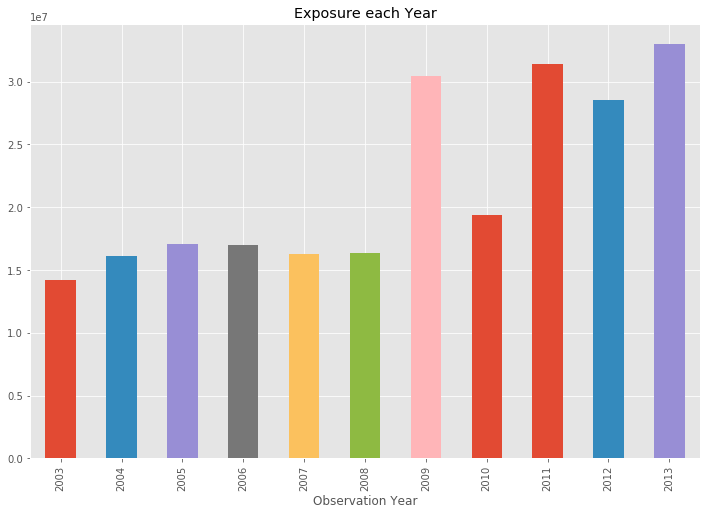

In [11]:
df.groupby("Observation Year")["Policies Exposed"].sum().plot(kind="bar",
                                                              title="Exposure each Year")

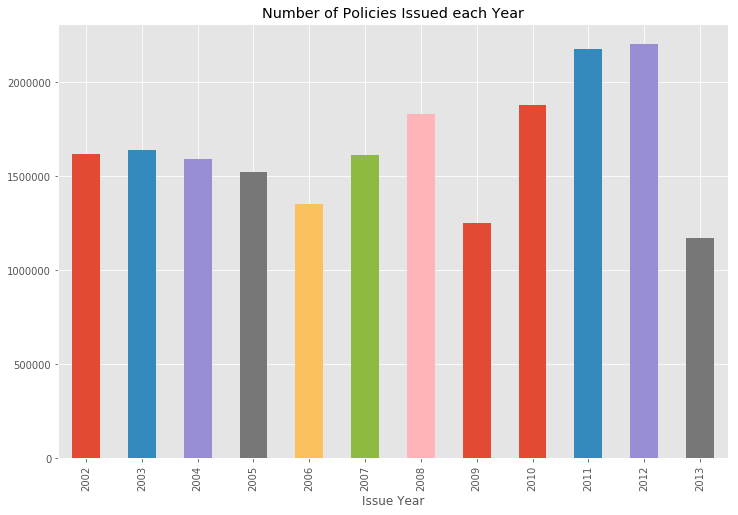

In [12]:
df[df["Duration"] == 1].groupby("Issue Year")["Policies Exposed"].sum().plot(kind="bar", 
                                                                             title="Number of Policies Issued each Year")

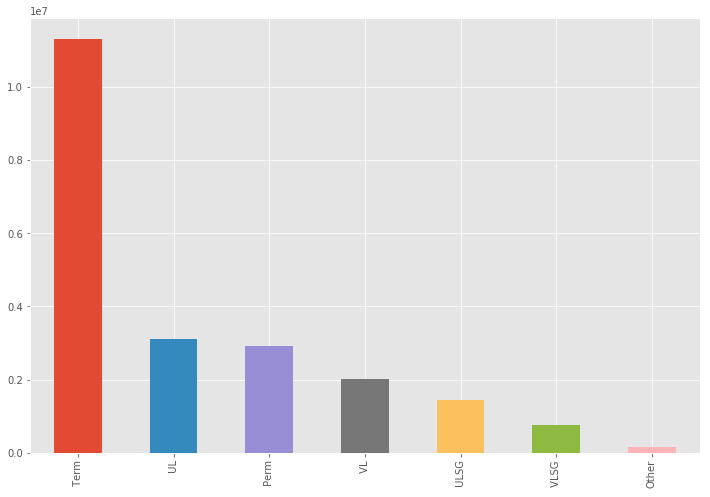

In [13]:
df["Insurance Plan"].value_counts().plot(kind="bar")

In [14]:
df["Preferred_Class"].value_counts()

2.0    6288890
1.0    6065388
3.0    2804367
4.0     979391
Name: Preferred_Class, dtype: int64

In [15]:
df["Number_Of_Preferred_Classes"].value_counts()

2.0    7102456
3.0    5292093
4.0    3743487
Name: Number_Of_Preferred_Classes, dtype: int64

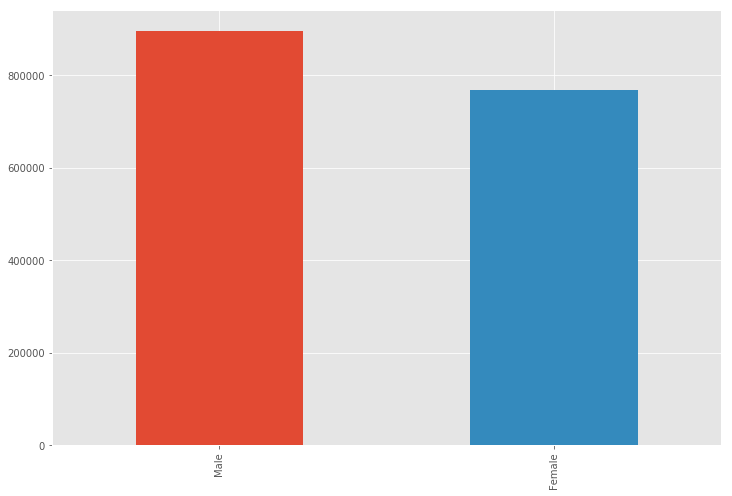

In [16]:
df.loc[df["Duration"] == 1, "Gender"].value_counts().plot(kind="bar")

In [17]:
df.pivot_table(index="Preferred_Class", columns="Number_Of_Preferred_Classes", values="Count", aggfunc=np.sum)

Number_Of_Preferred_Classes,2.0,3.0,4.0
Preferred_Class,,,
1.0,3399043.0,1630135.0,1036210.0
2.0,3703413.0,1673484.0,911993.0
3.0,NaN,1988474.0,815893.0
4.0,NaN,NaN,979391.0


count    1.662532e+06
mean     4.429986e+01
std      1.484334e+01
min      1.800000e+01
25%      3.200000e+01
50%      4.300000e+01
75%      5.500000e+01
max      9.500000e+01
Name: Issue Age, dtype: float64


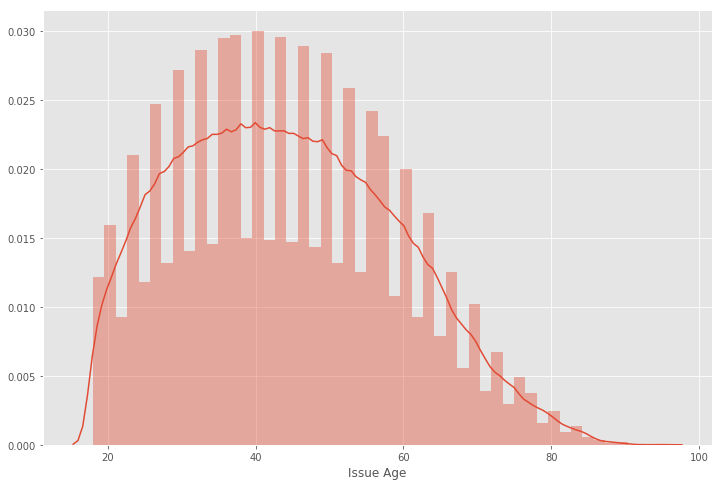

In [18]:
print(df.loc[df["Duration"] == 1, "Issue Age"].describe())
sns.distplot(df.loc[df["Duration"] == 1, "Issue Age"])

count    2.169763e+07
mean     8.242252e+00
std      5.306331e+00
min      1.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.200000e+01
max      2.400000e+01
Name: Duration, dtype: float64


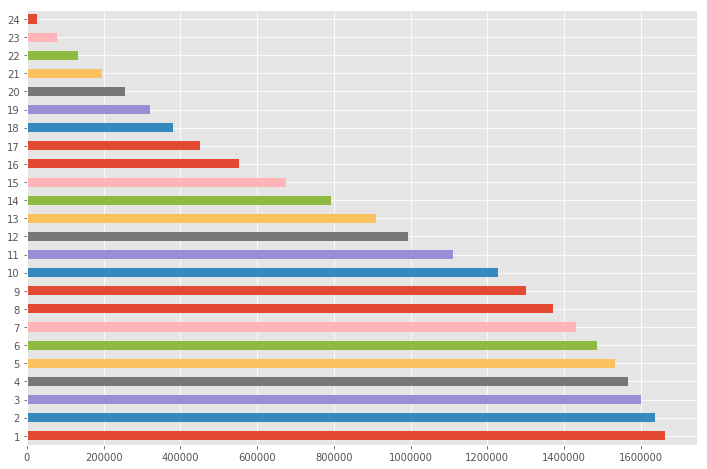

In [128]:
print(df["Duration"].describe())
df["Duration"].value_counts().plot(kind="barh")

In [19]:
print("A/E by Count", df["Number of Deaths"].sum() / df["Expected Death QX2015VBT by Policy"].sum())
print("A/E by Amount", df["Death Claim Amount"].sum() / df["Expected Death QX2015VBT by Amount"].sum())

A/E by Count 1.2041177231869207
A/E by Amount 0.9876874078433835


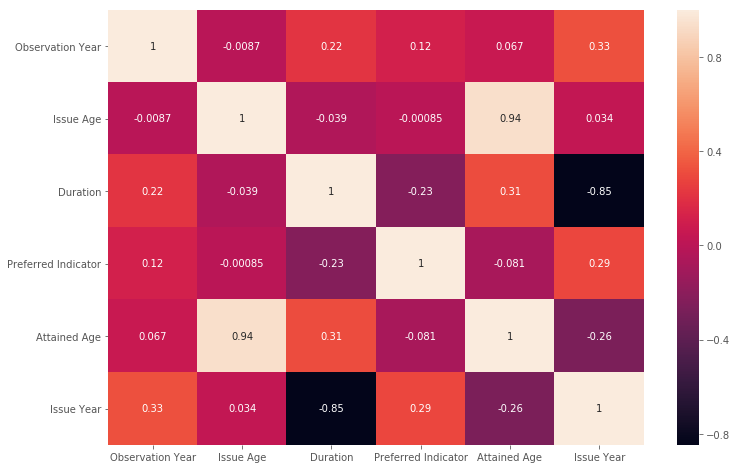

In [20]:
sns.heatmap(df[["Observation Year", "Issue Age",
                "Duration", "Preferred Indicator", "Attained Age", "Issue Year"
                ]].corr(), annot=True)

# Approach

## Traditional approach
<img src="../images/actuary.jpg"> </img>

In [129]:
def group_ae(input_df, col):
    grouped = input_df.groupby(col)
    out = grouped["Death Claim Amount"].sum() / grouped["Expected Death QX2015VBT by Amount"].sum()
    out = pd.DataFrame(out)
    out.columns = ["A/E by Amount"]
    
    out["Deaths"] = grouped["Number of Deaths"].sum()
    out["A/E by Count"] = grouped["Number of Deaths"].sum() / grouped["Expected Death QX2015VBT by Policy"].sum()
    return out

def plot_ae(input_df, col, rotation=None, **kwargs):
    x = group_ae(input_df, col)
    
    fig, ax = plt.subplots()
    x["A/E by Count"].plot(kind="bar", secondary_y=False, ax=ax, label="A/E", color="#619CFF", **kwargs)
    x["Deaths"].plot(kind="line", secondary_y=True, ax=ax, label="Deaths", color="#F8766D", **kwargs)
    print(x[["Deaths", "A/E by Count", "A/E by Amount"]])
    if rotation is not None:
        ax.set_xticklabels(x.index, rotation='vertical')
    ax.legend()
    

          Deaths  A/E by Count  A/E by Amount
Gender                                       
Female  308147.0      1.170580       0.974417
Male    426130.0      1.229592       0.993702


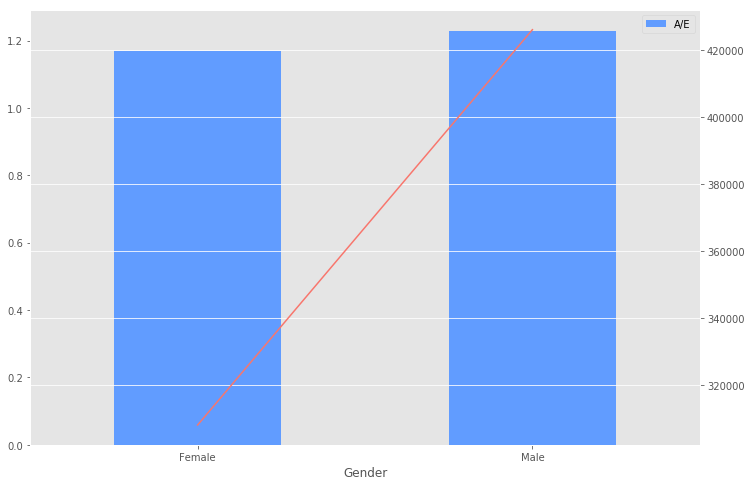

In [130]:
plot_ae(df, "Gender")

                    Deaths  A/E by Count  A/E by Amount
Face Amount Band                                       
    1-9999         85394.0      1.386804       1.391190
   10000-24999    131232.0      1.397368       1.375924
   25000-49999    111614.0      1.348678       1.331020
   50000-99999    125222.0      1.266389       1.246640
  100000-249999   169165.0      1.093640       1.073657
  250000-499999    60580.0      0.969862       0.962371
  500000-999999    30536.0      0.925469       0.919305
 1000000-2499999   17129.0      0.905610       0.901133
 2500000-4999999    2187.0      0.961514       0.959560
 5000000-9999999    1218.0      0.903065       0.896036


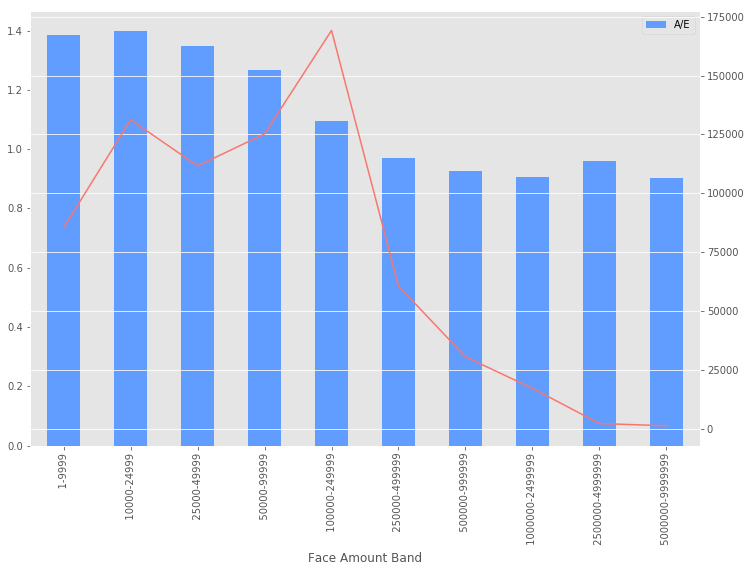

In [131]:
plot_ae(df, "Face Amount Band", rotation='vertical')

           Deaths  A/E by Count  A/E by Amount
Duration                                      
1         12225.0      1.611674       1.040224
2         16180.0      1.479783       1.030346
3         19894.0      1.365293       1.020972
4         22161.0      1.264864       0.997749
5         24201.0      1.231463       0.958812
6         26190.0      1.211357       0.945437
7         29398.0      1.214035       0.920405
8         32031.0      1.178199       0.923164
9         35242.0      1.162518       0.936725
10        39475.0      1.160134       0.970875
11        39225.0      1.208716       1.019461
12        42763.0      1.213546       0.989863
13        46522.0      1.199909       1.001067
14        46103.0      1.184921       1.007473
15        43579.0      1.169091       1.018464
16        41253.0      1.192595       1.030242
17        39401.0      1.181072       1.037334
18        38265.0      1.186797       1.040293
19        35217.0      1.181603       1.027729
20        319

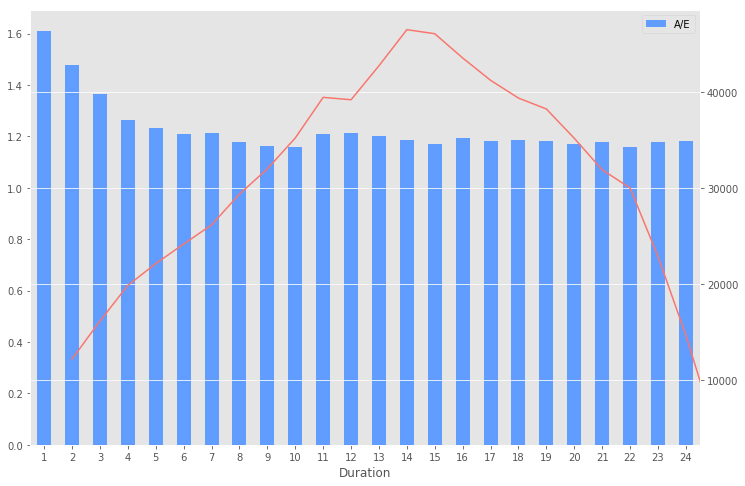

In [132]:
plot_ae(df, "Duration")

                  Deaths  A/E by Count  A/E by Amount
Insurance Plan                                       
 Perm           279855.0      1.251588       0.983823
 Term           204600.0      1.160542       0.958413
 UL             166083.0      1.249412       1.065368
 ULSG            23160.0      1.019529       0.916343
 VL              51427.0      1.113548       1.041190
 VLSG             7068.0      1.100183       1.045476
Other             2084.0      1.258929       0.957400


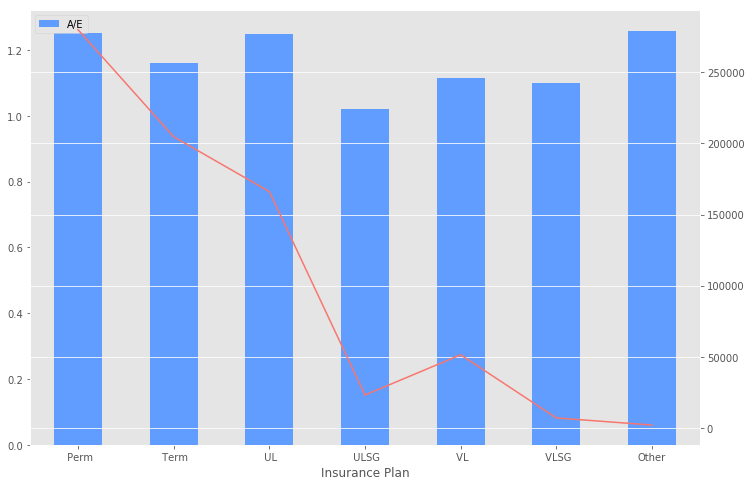

In [133]:
plot_ae(df, "Insurance Plan")

## GLM's
<img src="../images/linear_regression.png"></img>
In statistics, the generalized linear model (GLM) is a flexible generalization of ordinary linear regression that allows for response variables that have error distribution models other than a normal distribution. The GLM generalizes linear regression by allowing the linear model to be related to the response variable via a link function and by allowing the magnitude of the variance of each measurement to be a function of its predicted value.

A generalized linear model is made up of a linear predictor
\begin{align}
\eta_i = \beta_0 + \beta_1x_{1i} + ... + \beta_px_{pi}
\end{align}
and two functions:
* a link function that describes how the mean, $E(Y_i) = \mu_i$, depends on the linear predictor $g(\mu_i) = \eta_i$
* a variance function that describes how the variance, var($Y_i$) depends on the mean var($Y_i$) = $\phi V(\mu)$ where the dispersion parameter $\phi$ is a constant

<img src="../images/glm_link.PNG"> </img>

#### Train test split

In [87]:
SPLIT_YEAR = 2012
df_train = df[df["Observation Year"] < SPLIT_YEAR]
df_test = df[df["Observation Year"] >= SPLIT_YEAR]

In [88]:
def gen_model_df(cols, df=df_train):
    x = df.groupby(cols)["Policies Exposed", "Number of Deaths", "Expected Death QX2015VBT by Policy"].sum().reset_index()
    x = x[x["Policies Exposed"] > 0]
    x = x[x["Expected Death QX2015VBT by Policy"] > 0]
    
    if "Attained Age" in cols:
        x["Attained Age Band"] = age_band(x)
        
    if "Issue Age" in cols:
        x["Issue Age Band"] = age_band(x, col="Issue Age")
        
    if "Duration" in cols:
        x["Duration Band"] = duration_band(x)
    
    x["A/E"] = x["Number of Deaths"] / x["Expected Death QX2015VBT by Policy"] 
    
    return x

TARGET_VARIABLE = "Number of Deaths"
EXPECTED_VARIABLE = "Expected Death QX2015VBT by Policy"

df["A/E"] = df[TARGET_VARIABLE] / df[EXPECTED_VARIABLE] 

In [89]:
def model_results(model_df, cols):
    """Summarize model output at cols level.
    """
    model_df["A/E Model"] = fit_lm.predict(model_df)
    model_df["Actual Model"] = model_df["A/E Model"] * model_df[EXPECTED_VARIABLE]
    
    x = model_df.groupby(cols).agg({
                        TARGET_VARIABLE: np.sum, 
                        "Actual Model": np.sum, 
                        EXPECTED_VARIABLE: np.sum})
    
    x["A/E Model"] = x["Actual Model"] / x[EXPECTED_VARIABLE]
    x["A/E Traditional"] = x[TARGET_VARIABLE] / x[EXPECTED_VARIABLE]
    return x[["A/E Model", "A/E Traditional"]]

### OLS
<img src="../images/IQu3m.png"></img>

In [90]:
model_df = gen_model_df(["Attained Age", "Gender", "Smoker Status", "Preferred Indicator"])

fit_lm = smf.glm('Q("A/E") ~ Q("Attained Age") ' \
                 '+ Q("Gender") + Q("Smoker Status")', 
                 model_df).fit()

print(fit_lm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Q("A/E")   No. Observations:                  624
Model:                            GLM   Df Residuals:                      620
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                        0.072723
Method:                          IRLS   Log-Likelihood:                -65.628
Date:                Thu, 20 Sep 2018   Deviance:                       45.088
Time:                        16:33:23   Pearson chi2:                     45.1
No. Iterations:                     3   Covariance Type:             nonrobust
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.5777      0.033     47.931      0.000       1.513       1.64

In [91]:
print("AIC is", fit_lm.aic)

AIC is 139.25546156798458


In [92]:
fit_lm.predict(model_df).describe()

count    624.000000
mean       1.270961
std        0.170132
min        0.931647
25%        1.139883
50%        1.270961
75%        1.402039
max        1.610275
dtype: float64

In [93]:
model_results(model_df, ["Attained Age Band"])

,A/E Model,A/E Traditional
Attained Age Band,,
18~29,1.509094,1.607356
30~39,1.426340,1.381475
40~49,1.368729,1.238310
50~59,1.305875,1.250735
60~64,1.259226,1.233640
65~69,1.223210,1.271556
70+,1.114106,1.205244


## Transformation vs. GLM

In some situations a response variable can be transformed to improve linearity and homogeneity of variance so that a general linear model can be applied. This approach has some drawbacks 
* response variable has changed
* transformation must simulateneously improve linearity and homogeneity of variance
* transformation may not be defined on the boundaries of the sample space

For example, a common remedy for the variance increasing with the mean is to apply the log transform, e.g.
\begin{align}
\text{log}(y_i) &= \beta_0 + \beta_1 x_1 + \epsilon_i \\
\Rightarrow E(log Y_i) &= \beta_0 + \beta_1 x_1
\end{align}
This is a linear model for the mean of log Y which may not always be appropriate. E.g. if Y is income perhaps we are really interested in the mean income of population subgroups, in which case it would be better to model $E(Y)$ using a glm 
\begin{align}
\text{log} E(Y_i) = \beta_0 + \beta_1 x_1
\end{align}
with $V(\mu) = \mu$. This also avoids difficulties with $y = 0$.

## Poisson regression
Counts are discrete and non-negative - thus modeling their distribution requires a different type of GLM. Luckily, we can again achieve that by changing the link function.



Suppose
\begin{align}
Y_i ∼ Poisson(\lambda_i)
\end{align}
Then
\begin{align}
E(Y_i) = \lambda_i var(Y_i) = \lambda_i
\end{align}
So our variance function is
\begin{align}
V (\mu_i) = \mu_i
\end{align}
Our link function must map from $(0, \inf) \rightarrow (−\inf, \inf)$. A natural choice is
\begin{align}
g(\mu_i) = log(\mu_i)
\end{align}

### Modeling with no factors

In [94]:
model_df = gen_model_df(["Gender"])
fit_lm = smf.glm('Q("' + TARGET_VARIABLE + '") ~ 1', 
                 model_df, 
                 offset=np.log(model_df[EXPECTED_VARIABLE]),
                 family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(fit_lm.summary())
print(np.exp(fit_lm.params))

                   Generalized Linear Model Regression Results                   
Dep. Variable:     Q("Number of Deaths")   No. Observations:                    2
Model:                               GLM   Df Residuals:                        1
Model Family:                    Poisson   Df Model:                            0
Link Function:                       log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -277.08
Date:                   Thu, 20 Sep 2018   Deviance:                       525.61
Time:                           16:33:24   Pearson chi2:                     524.
No. Iterations:                        4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2122      0.001    151.906      0.000       0.209       0.215
Intercept    1.236366
dty

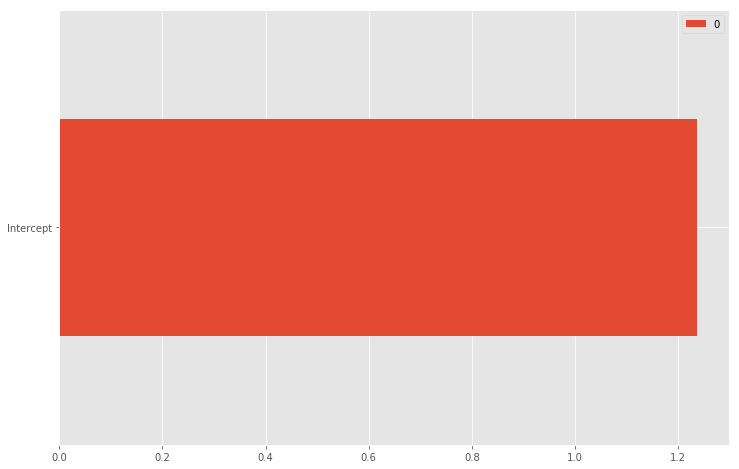

In [95]:
pd.DataFrame(np.exp(fit_lm.params)).plot(kind="barh")

In [96]:
model_results(model_df, ["Gender"])

,A/E Model,A/E Traditional
Gender,,
Female,1.236366,1.191142
Male,1.236366,1.270921


In [97]:
model_results(gen_model_df(["Gender", "Smoker Status"]), ["Smoker Status"])

,A/E Model,A/E Traditional
Smoker Status,,
Nonsmoker,1.236366,1.236701
Smoker,1.236366,1.235250


### Modeling with a limited set of factors

In [98]:
model_df = gen_model_df(["Attained Age", "Gender", "Smoker Status", "Preferred Indicator"])
fit_lm = smf.glm('Q("' + TARGET_VARIABLE + '") ~ Q("Gender") + Q("Smoker Status") + Q("Preferred Indicator")', 
                 model_df, 
                 offset=np.log(model_df[EXPECTED_VARIABLE]),
                 family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(fit_lm.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     Q("Number of Deaths")   No. Observations:                  624
Model:                               GLM   Df Residuals:                      620
Model Family:                    Poisson   Df Model:                            3
Link Function:                       log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -4716.8
Date:                   Thu, 20 Sep 2018   Deviance:                       4696.2
Time:                           16:33:29   Pearson chi2:                 4.81e+03
No. Iterations:                        6   Covariance Type:             nonrobust
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.2063      0.002     82.869      0

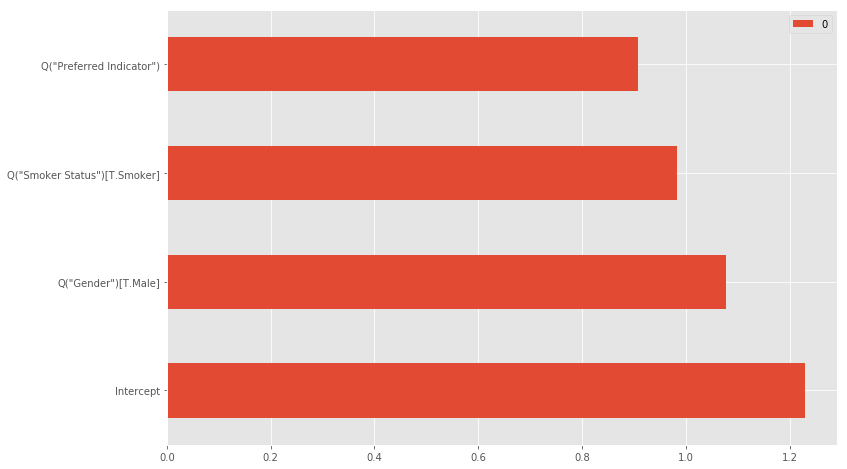

In [99]:
pd.DataFrame(np.exp(fit_lm.params)).plot(kind="barh")

In [100]:
model_results(model_df, ["Gender"])

,A/E Model,A/E Traditional
Gender,,
Female,1.191142,1.191142
Male,1.270921,1.270921


In [101]:
model_results(model_df, ["Attained Age Band"])

,A/E Model,A/E Traditional
Attained Age Band,,
18~29,1.230650,1.607356
30~39,1.224197,1.381475
40~49,1.227895,1.238310
50~59,1.229990,1.250735
60~64,1.233960,1.233640
65~69,1.238319,1.271556
70+,1.241858,1.205244


### Modeling with attained age

In [102]:
model_df = gen_model_df(["Attained Age", "Gender", "Smoker Status", "Preferred Indicator"])

fit_lm = smf.glm('Q("' + TARGET_VARIABLE + '") ~ I(Q("Attained Age")**2) + Q("Attained Age") ' \
                 '+ Q("Gender") + Q("Smoker Status") + Q("Preferred Indicator")', 
                 model_df, 
                 offset=np.log(model_df[EXPECTED_VARIABLE]),
                 family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(fit_lm.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     Q("Number of Deaths")   No. Observations:                  624
Model:                               GLM   Df Residuals:                      618
Model Family:                    Poisson   Df Model:                            5
Link Function:                       log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -4056.9
Date:                   Thu, 20 Sep 2018   Deviance:                       3376.5
Time:                           16:33:32   Pearson chi2:                 3.48e+03
No. Iterations:                        7   Covariance Type:             nonrobust
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.2284      0.022     10.507      0

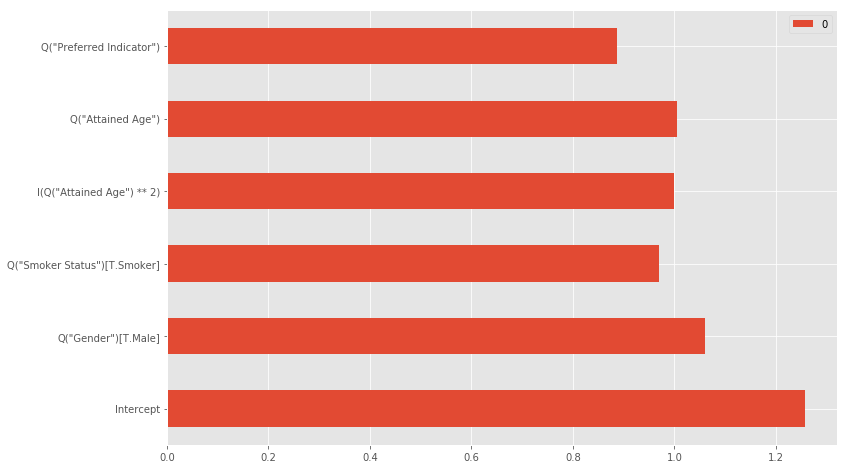

In [103]:
pd.DataFrame(np.exp(fit_lm.params)).plot(kind="barh")

In [104]:
model_results(model_df, ["Attained Age Band"])

,A/E Model,A/E Traditional
Attained Age Band,,
18~29,1.309537,1.607356
30~39,1.311326,1.381475
40~49,1.305981,1.238310
50~59,1.284598,1.250735
60~64,1.263353,1.233640
65~69,1.247176,1.271556
70+,1.186291,1.205244


In [105]:
model_results(gen_model_df(["Attained Age Band", "Attained Age", "Gender", "Smoker Status", "Preferred Indicator", "Duration"]), 
              ["Duration Band"])

,A/E Model,A/E Traditional
Duration Band,,
1~5,1.236540,1.383649
6~10,1.232202,1.232895
10+,1.237972,1.207528


### Adding issue year and duration

In [106]:
model_df = gen_model_df(["Issue Year Band", "Issue Age", "Duration", "Gender", "Smoker Status", "Preferred Indicator"])

fit_lm = smf.glm('Q("' + TARGET_VARIABLE + '") ~ bs(Q("Issue Age"), df=3) + ' \
                 'Q("Gender") + Q("Smoker Status") + Q("Preferred Indicator") + Q("Duration") + ' \
                 'Q("Issue Year Band")', 
                 model_df, 
                 offset=np.log(model_df[EXPECTED_VARIABLE]),
                 family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(fit_lm.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     Q("Number of Deaths")   No. Observations:                16601
Model:                               GLM   Df Residuals:                    16592
Model Family:                    Poisson   Df Model:                            8
Link Function:                       log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -46722.
Date:                   Thu, 20 Sep 2018   Deviance:                       24577.
Time:                           16:33:38   Pearson chi2:                 2.51e+04
No. Iterations:                        6   Covariance Type:             nonrobust
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.6695      0.013     53.123    

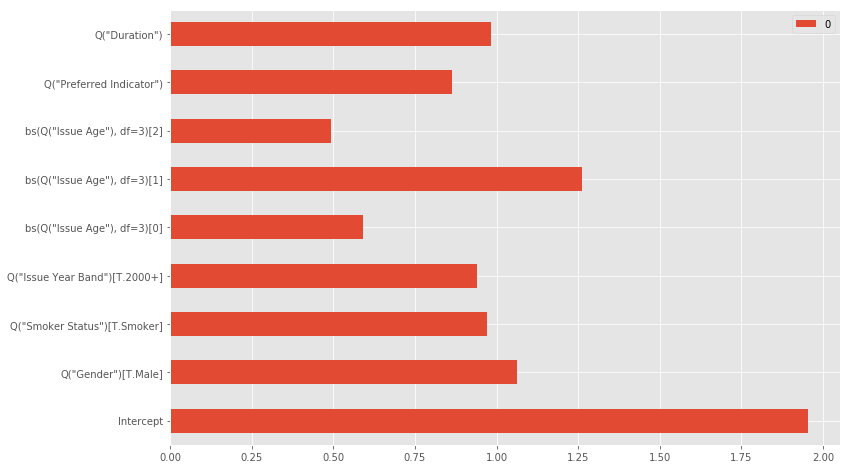

In [107]:
pd.DataFrame(np.exp(fit_lm.params)).plot(kind="barh")

In [108]:
model_results(model_df, ["Duration Band"])

,A/E Model,A/E Traditional
Duration Band,,
1~5,1.328108,1.383649
6~10,1.270393,1.232895
10+,1.204138,1.207528


In [109]:
model_results(gen_model_df(["Issue Age", "Gender", "Smoker Status", "Preferred Indicator", "Duration", "Issue Year Band",
                           "Insurance Plan"]), 
              ["Insurance Plan"])

,A/E Model,A/E Traditional
Insurance Plan,,
Perm,1.221880,1.283928
Term,1.266863,1.191349
UL,1.221822,1.273053
ULSG,1.154092,1.047442
VL,1.257142,1.133791
VLSG,1.192879,1.068933
Other,1.315212,1.243666


## Residuals

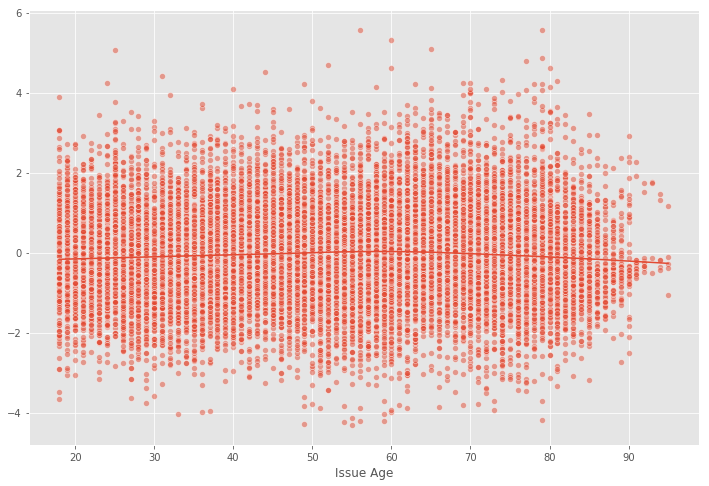

In [110]:
col = "Issue Age"
sns.scatterplot(model_df[col], fit_lm.resid_deviance, alpha=.5)

z = sm.nonparametric.lowess(fit_lm.resid_deviance, model_df[col])
plt.plot(z[:, 0], z[:, 1])

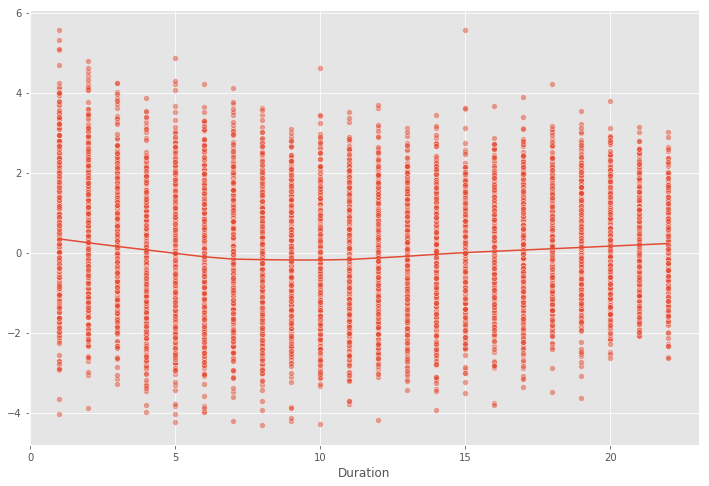

In [111]:
col = "Duration"
sns.scatterplot(model_df[col], fit_lm.resid_deviance, alpha=.5)

z = sm.nonparametric.lowess(fit_lm.resid_deviance, model_df[col])
plt.plot(z[:, 0], z[:, 1])

### Overdispersion

In [112]:
fit_lm.deviance / fit_lm.df_resid

1.4812289647122738

## Interactions
An interaction between two variables is when the effect of one variable depends on (is modified by) another variable.

For example, the relationship beween duration and lapse rates could depend on product.

In [113]:
model_df = gen_model_df(["Issue Year Band", "Issue Age", "Duration", "Gender", "Smoker Status", "Preferred Indicator", "Term"])

fit_lm = smf.glm('Q("' + TARGET_VARIABLE + '") ~ bs(Q("Issue Age"), df=3) + ' \
                 'Q("Gender") + Q("Smoker Status") + Q("Preferred Indicator") + Q("Duration"):Q("Issue Year Band") + ' \
                 'Q("Term")', 
                 model_df, 
                 offset=np.log(model_df[EXPECTED_VARIABLE]),
                 family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(fit_lm.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     Q("Number of Deaths")   No. Observations:                31398
Model:                               GLM   Df Residuals:                    31388
Model Family:                    Poisson   Df Model:                            9
Link Function:                       log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -72749.
Date:                   Thu, 20 Sep 2018   Deviance:                       41257.
Time:                           16:33:48   Pearson chi2:                 4.50e+04
No. Iterations:                        6   Covariance Type:             nonrobust
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                         

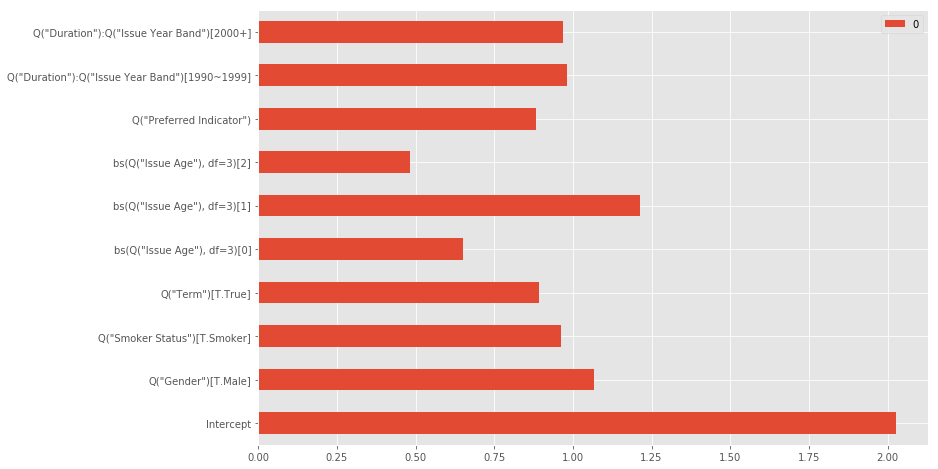

In [114]:
pd.DataFrame(np.exp(fit_lm.params)).plot(kind="barh")

# Results

In [115]:
model_results(model_df, ["Gender"])

,A/E Model,A/E Traditional
Gender,,
Female,1.191142,1.191142
Male,1.270921,1.270921


In [116]:
model_results(model_df, ["Issue Age Band"])

,A/E Model,A/E Traditional
Issue Age Band,,
18~29,1.395508,1.389272
30~39,1.255600,1.253998
40~49,1.237351,1.249719
50~59,1.245968,1.226790
60~64,1.239737,1.247873
65~69,1.225457,1.247171
70+,1.173859,1.164908


In [117]:
model_results(model_df, ["Term"])

,A/E Model,A/E Traditional
Term,,
False,1.254316,1.254316
True,1.191349,1.191349


In [118]:
summary_cols = ["Issue Age Band", "Gender", "Smoker Status", "Preferred Indicator"]

train_results = model_results(model_df, summary_cols)
train_results.columns = [x + " Train" for x in train_results.columns]

In [119]:
test_results = model_results(df_test, summary_cols)
test_results.columns = [x + " Test" for x in test_results.columns]

/datadrive/anaconda3/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/datadrive/anaconda3/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [120]:
results = pd.concat((train_results, test_results), axis=1)
results.head()

A/E Model Train  \
Issue Age Band Gender Smoker Status Preferred Indicator                    
18~29          Female Nonsmoker     0                           1.378433   
                                    1                           1.251919   
                      Smoker        0                           1.331787   
                                    1                           1.211224   
               Male   Nonsmoker     0                           1.484267   

                                                         A/E Traditional Train  \
Issue Age Band Gender Smoker Status Preferred Indicator                          
18~29          Female Nonsmoker     0                                 1.234196   
                                    1                                 1.118454   
                      Smoker        0                                 1.378735   
                                    1                                 1.124865   
               Male   Nonsmoker     0                                 1.521955   

                                                         A/E Model Test  \
Issue Age Band Gender Smoker Status Preferred Indicator                   
18~29          Female Nonsmoker     0                          1.249397   
                                    1                          1.151221   
                      Smoker        0                          1.200064   
                                    1                          1.129810   
               Male   Nonsmoker     0                          1.331578   

                                                         A/E Traditional Test  
Issue Age Band Gender Smoker Status Preferred Indicator                        
18~29          Female Nonsmoker     0                                1.151964  
                                    1                                1.164095  
                      Smoker        0                                1.412502  
                                    1                                1.024912  
               Male   Nonsmoker     0                                1.374151

In [121]:
results["sort"] = np.abs(results["A/E Traditional Train"] - results["A/E Traditional Test"])
results.sort_values("sort").tail()

,,,,A/E Model Train,A/E Traditional Train,A/E Model Test,A/E Traditional Test,sort
Issue Age Band,Gender,Smoker Status,Preferred Indicator,,,,,
40~49,Female,Smoker,1,1.101394,1.199389,1.011406,1.037315,0.162074
30~39,Male,Nonsmoker,1,1.215243,1.250780,1.119651,1.073269,0.177511
60~64,Female,Smoker,1,1.124448,1.262946,1.051429,1.085138,0.177808
65~69,Male,Nonsmoker,0,1.301086,1.351214,1.196376,1.161885,0.189329
70+,Female,Smoker,1,1.085700,1.066638,1.003137,0.858248,0.208389


In [122]:
results.sort_values("sort").head()

A/E Model Train  \
Issue Age Band Gender Smoker Status Preferred Indicator                    
30~39          Female Smoker        0                           1.222758   
                      Nonsmoker     1                           1.140110   
40~49          Male   Smoker        0                           1.290166   
               Female Nonsmoker     1                           1.124206   
60~64          Female Nonsmoker     1                           1.124265   

                                                         A/E Traditional Train  \
Issue Age Band Gender Smoker Status Preferred Indicator                          
30~39          Female Smoker        0                                 1.273405   
                      Nonsmoker     1                                 1.073325   
40~49          Male   Smoker        0                                 1.361855   
               Female Nonsmoker     1                                 1.125291   
60~64          Female Nonsmoker     1                                 1.180753   

                                                         A/E Model Test  \
Issue Age Band Gender Smoker Status Preferred Indicator                   
30~39          Female Smoker        0                          1.104483   
                      Nonsmoker     1                          1.051336   
40~49          Male   Smoker        0                          1.170467   
               Female Nonsmoker     1                          1.037989   
60~64          Female Nonsmoker     1                          1.061739   

                                                         A/E Traditional Test  \
Issue Age Band Gender Smoker Status Preferred Indicator                         
30~39          Female Smoker        0                                1.266674   
                      Nonsmoker     1                                1.056083   
40~49          Male   Smoker        0                                1.341762   
               Female Nonsmoker     1                                1.104795   
60~64          Female Nonsmoker     1                                1.157409   

                                                             sort  
Issue Age Band Gender Smoker Status Preferred Indicator            
30~39          Female Smoker        0                    0.006732  
                      Nonsmoker     1                    0.017242  
40~49          Male   Smoker        0                    0.020093  
               Female Nonsmoker     1                    0.020496  
60~64          Female Nonsmoker     1                    0.023344

# Modeling mortality directly

## Poisson regression
Let $\mu_x$ be the force of mortality.
\begin{align}
\eta_x = log E[D_x] = \text{log}( e_x) + \text{log} (\mu_x) 
\end{align}

In [123]:
mort_df = gen_model_df(["Issue Age", "Duration", "Gender", "Smoker Status"])

fit_lm = smf.glm('Q("' + TARGET_VARIABLE + '") ~ bs(Q("Issue Age"), df=3) + ' \
                 'Q("Gender") + Q("Smoker Status") + Q("Duration")', 
                 mort_df, 
                 offset=np.log(mort_df["Policies Exposed"]),
                 family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(fit_lm.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     Q("Number of Deaths")   No. Observations:                 5898
Model:                               GLM   Df Residuals:                     5891
Model Family:                    Poisson   Df Model:                            6
Link Function:                       log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -27282.
Date:                   Thu, 20 Sep 2018   Deviance:                       21797.
Time:                           16:34:25   Pearson chi2:                 2.27e+04
No. Iterations:                        6   Covariance Type:             nonrobust
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -9.2554      0.012   -749.249      0

In [124]:
mort_df["q_x"] = fit_lm.predict(mort_df) 
mort_df.groupby(["Smoker Status", "Gender", "Issue Age", "Duration"])["q_x"].mean().unstack()*1000

Duration                                1           2           3   \
Smoker Status Gender Issue Age                                       
Nonsmoker     Female 18           0.109547    0.125535    0.143858   
                     19           0.109419    0.125389    0.143690   
                     20           0.109843    0.125875    0.144247   
                     21           0.110813    0.126987    0.145522   
                     22           0.112332    0.128727    0.147515   
                     23           0.114406    0.131105    0.150240   
                     24           0.117054    0.134139    0.153717   
                     25           0.120300    0.137858    0.157979   
                     26           0.124174    0.142298    0.163067   
                     27           0.128718    0.147504    0.169033   
                     28           0.133978    0.153533    0.175942   
                     29           0.140013    0.160449    0.183867   
                     30           0.146891    0.168330    0.192899   
                     31           0.154689    0.177267    0.203140   
                     32           0.163499    0.187363    0.214709   
                     33           0.173425    0.198737    0.227744   
                     34           0.184586    0.211527    0.242400   
                     35           0.197117    0.225887    0.258857   
                     36           0.211175    0.241997    0.277317   
                     37           0.226934    0.260056    0.298012   
                     38           0.244595    0.280295    0.321205   
                     39           0.264385    0.302974    0.347194   
                     40           0.286562    0.328387    0.376316   
                     41           0.311415    0.356867    0.408954   
                     42           0.339275    0.388794    0.445540   
                     43           0.370515    0.424593    0.486565   
                     44           0.405556    0.464749    0.532581   
                     45           0.444875    0.509806    0.584215   
                     46           0.489008    0.560381    0.642172   
                     47           0.538563    0.617169    0.707247   
...                                    ...         ...         ...   
Smoker        Male   64          11.535106   13.218706   15.148035   
                     65          12.899129   14.781814   16.939286   
                     66          14.420918   16.525715   18.937717   
                     67          16.116444   18.468711   21.164302   
                     68          18.002776   20.630362   23.641455   
                     69          20.098043   23.031442   26.392984   
                     70          22.421372   25.693872   29.444007   
                     71          24.992797   28.640607   32.820831   
                     72          27.833119   31.895487   36.550775   
                     73          30.963735   35.483030   40.661937   
                     74          34.406410   39.428180   45.182898   
                     75          38.183001   43.755980   50.142361   
                     76          42.315114   48.491194   55.568700   
                     77          46.823714   53.657844   61.489446   
                     78          51.728655   59.278683   67.930671   
                     79          57.048154   65.374586   74.916299   
                     80          62.798201   71.963878   82.467328   
                     81          68.991900   79.061576   90.600966   
                     82          75.638763   86.678578   99.329704   
                     83          82.743949   94.820798  108.660316   
                     84          90.307472  103.488251  118.592823   
                     85          98.323392  112.674130  129.119422   
                     86         106.779000  122.363871  140.223424   
                     87         115.654032  132.534254  151.878220   
          

## Cox proportional hazards
* Hazard rate for event in any group is a constant multiple of the hazard rate in any other. This coincides nicely with how mortality factors are used.
* Model is semi-parametric, the baseline hazard does not need to be specified.
* Model can be stratified for variables that do not satisfy the proportional hazards assumption.
* Cox PH and Poisson GLM are equivalent when making the assumption that the baseline hazard is constant for certain time intervals and creating pseudo-observations for each combination of individual and interval. 